In [27]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
# load and filter osm network (step 1)
import geopandas as gpd
from geopandas import GeoDataFrame
import pandas as pd
import time
import networkx as nx
import osmnx as ox
import numpy as np
import rasterio as rt
import shapely
#import GOSTnets as gn
#import peartree
import pickle


In [31]:
# Get reference to GOSTNets
import sys
sys.path.insert(1,"/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets")
from fetch_pois import *
#from load_osm import losm
## Can't seem to work https://stackoverflow.com/questions/62858552/why-cant-i-import-geopy-distance-vincenty-on-jupyter-notebook-i-installed-ge


In [7]:

from shapely.geometry import Point, box, Polygon
from shapely.ops import unary_union, linemerge, transform
from shapely.wkt import loads
from shapely import wkt
from shapely.geometry import LineString, MultiLineString, Point


In [12]:
#### Might not use these
import fiona
from osgeo import gdal
import importlib
import matplotlib.pyplot as plt
import subprocess, glob

In [8]:
try:
    os.mkdir('../data' + '/osm_infrastructure')
except FileExistsError:
    pass

In [13]:
#from GOSTnets import load_osm as losm
import importlib
pd.set_option('display.max_rows', 500)


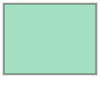

In [23]:
city = gpd.read_file("../data/Kumasi_shp/clipping_boundary.geojson").set_crs(epsg=4326)
bound = city.geometry.iloc[0]
bound.buffer(0)

In [32]:
school_tags = {'amenity':['school', 'kindergarten', 'university', 'college']}
# Removing pharmacy from health_tags
health_tags = {'amenity':['clinic', 'hospital', 'health']}
police_tags = {'amenity':['police']}
fire_station_tags = {'amenity':['fire_station']}
finance_tags = {'amenity': ['atm', 'bank']}
markets_tags = {'amenity': ['marketplace']}
tag_dictionary = {'schools': school_tags, 'health': health_tags,
                  'police': police_tags, 'fire': fire_station_tags,
                 'finance': finance_tags,
                 'markets': markets_tags}


In [33]:

queries = {}
for tags in tag_dictionary.items():
    print(tags[0])
    # create the OsmObject
    queries[tags[0]] = OsmObject(f'{tags[0]}', bound.buffer(0), tags[1])
query_results_gpd_dict = {}

for query in queries.items():
    print(query)
    result = query[1].GenerateOSMPOIs()
    
    # if query is not empty
    if result.empty == False:
        
        query[1].RemoveDupes(0.0005)
        
        #print(query[1].df)

        if 'name' in query[1].df.columns:
            query_results = query[1].df[['amenity','geometry','name']]
        else:
            query_results = query[1].df[['amenity','geometry']]

        # convert to GeoDataFrame
        query_results_gpd = gpd.GeoDataFrame(query_results, crs = "epsg:4326", geometry = 'geometry')
        query_results_gpd.to_file('../data' + f'/osm_infrastructure/osm_{query[0]}.shp')

        #save result in query_results_gpd_dict 
        query_results_gpd_dict[query[0]] = query_results_gpd
        


schools
health
police
fire
finance
markets
('schools', <fetch_pois.OsmObject object at 0x7ffe80122ca0>)
is df empty: False


/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygons['geometry'] = polygons.centroid
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['buffer'] = gdf['geometry'].buffer(buf_width)
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  l = l.append(row, ignore_index = True)
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:106: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  

('health', <fetch_pois.OsmObject object at 0x7ffe801224f0>)
is df empty: False


/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  l = l.append(row, ignore_index = True)
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:106: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  current_points = cascaded_union(l['buffer'])
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  l = l.append(row, ignore_index = True)
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:106: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  current_points = cascaded_union(l['buffer'])
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:110: FutureWarning: The frame.ap

('police', <fetch_pois.OsmObject object at 0x7ffe801221c0>)
is df empty: False


/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  l = l.append(row, ignore_index = True)
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:106: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  current_points = cascaded_union(l['buffer'])
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  l = l.append(row, ignore_index = True)
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:106: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  current_points = cascaded_union(l['buffer'])
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:110: FutureWarning: The frame.ap

('fire', <fetch_pois.OsmObject object at 0x7ffe7fdf2100>)
is df empty: False
('finance', <fetch_pois.OsmObject object at 0x7ffe633f5df0>)


/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygons['geometry'] = polygons.centroid
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['buffer'] = gdf['geometry'].buffer(buf_width)
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  l = l.append(row, ignore_index = True)
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:106: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  

is df empty: False


/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:83: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygons['geometry'] = polygons.centroid
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['buffer'] = gdf['geometry'].buffer(buf_width)
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  l = l.append(row, ignore_index = True)
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:106: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  

('markets', <fetch_pois.OsmObject object at 0x7ffe633f5dc0>)
is df empty: False


/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['buffer'] = gdf['geometry'].buffer(buf_width)
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:104: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  l = l.append(row, ignore_index = True)
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:106: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  current_points = cascaded_union(l['buffer'])
/Users/ccsuehara/GH_folders/GOSTnets/GOSTnets/fetch_pois.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  l = l.append(row, ignore_index = True)
/Users/c

In [38]:
with open('../data/Kumasi_places.pickle', 'wb') as handle:
    pickle.dump(query_results_gpd_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

,amenity,geometry,name
0,school,POINT (-1.59929 6.66302),Ahinsan Primary School
1,school,POINT (-1.58991 6.65821),Atonsu Agogo Primary School
2,school,POINT (-1.57409 6.64853),Ramseyer Institute
3,school,POINT (-1.61520 6.66494),Adiebeba School
4,college,POINT (-1.56687 6.67560),Faculty of Agriculture
5,college,POINT (-1.56584 6.67459),Department of Modern Languages
6,school,POINT (-1.67039 6.66791),P and G High school
7,school,POINT (-1.67127 6.66646),Aburaso Methodist Primary school
8,kindergarten,POINT (-1.67158 6.66884),NaN
9,school,POINT (-1.62967 6.70976),State Boys Primary and JHS
